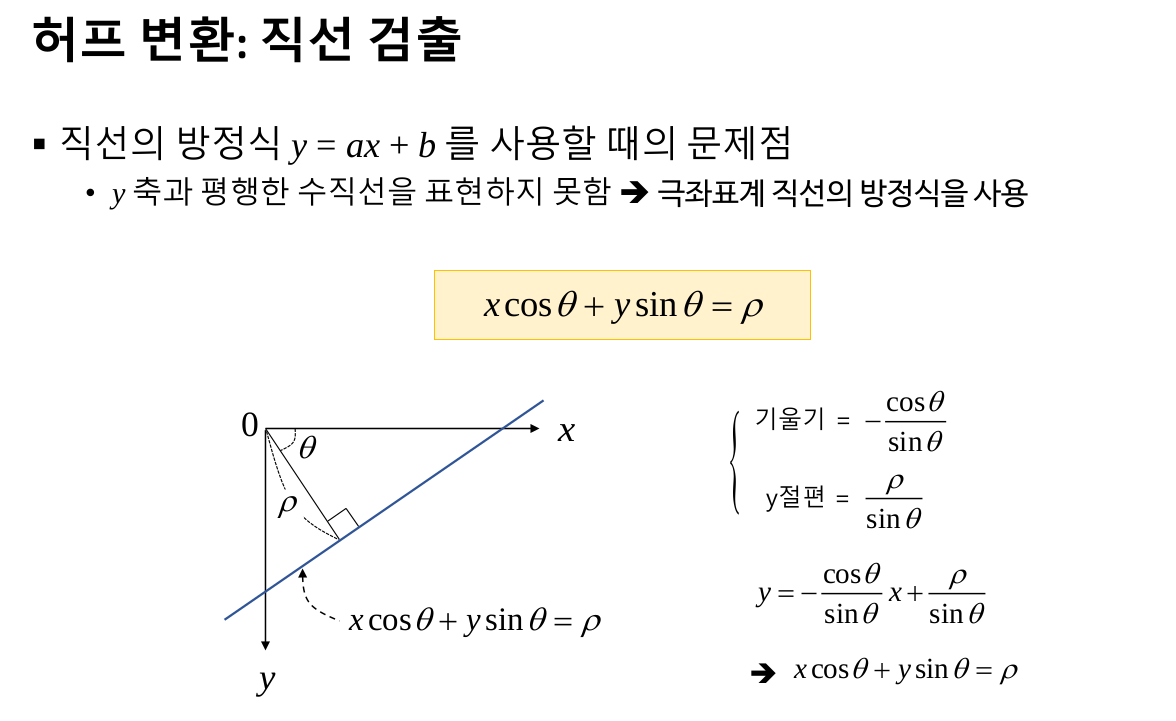

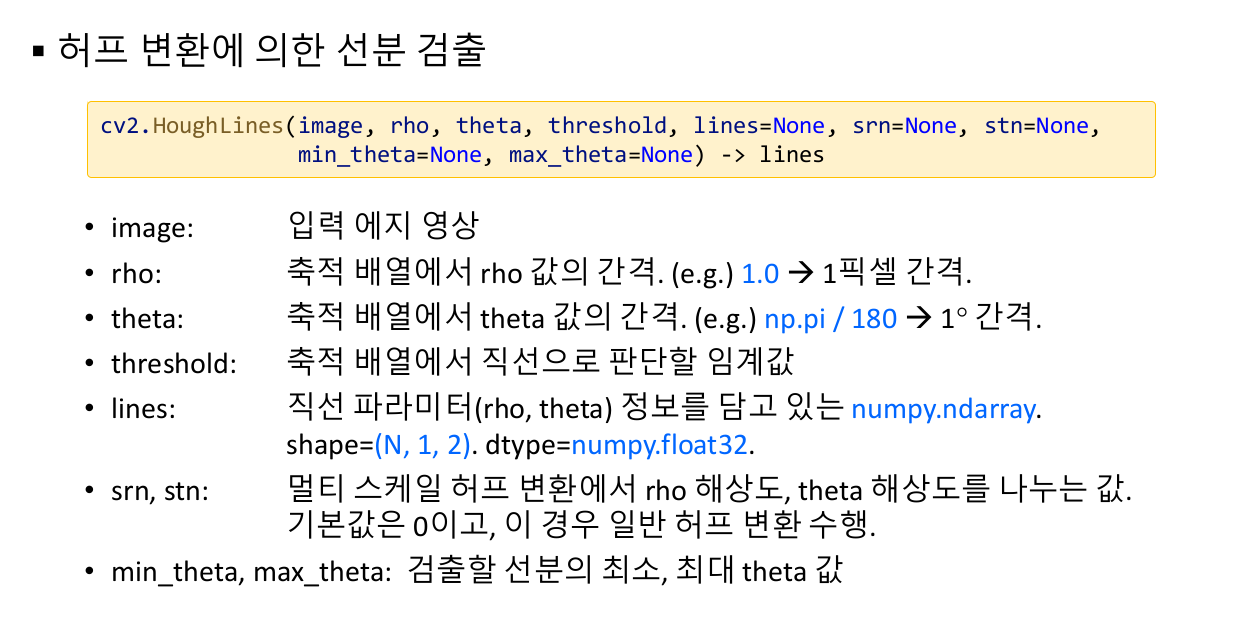

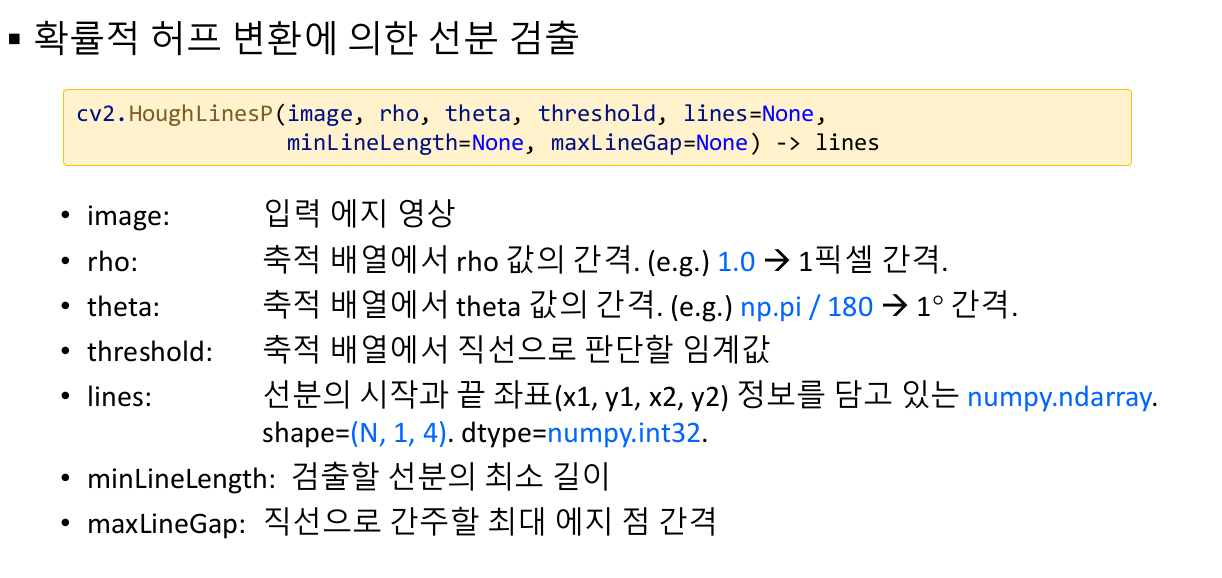

In [1]:
import sys
import numpy as np
import cv2

In [2]:
src = cv2.imread('../data/building.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
if src is None:
    print('Image load failed!')
    sys.exit()

In [5]:
edges = cv2.Canny(src,50,50)

In [6]:
lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 160,
                        minLineLength=50, maxLineGap=5)

In [7]:
dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

In [8]:
if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

In [9]:
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 원 검출

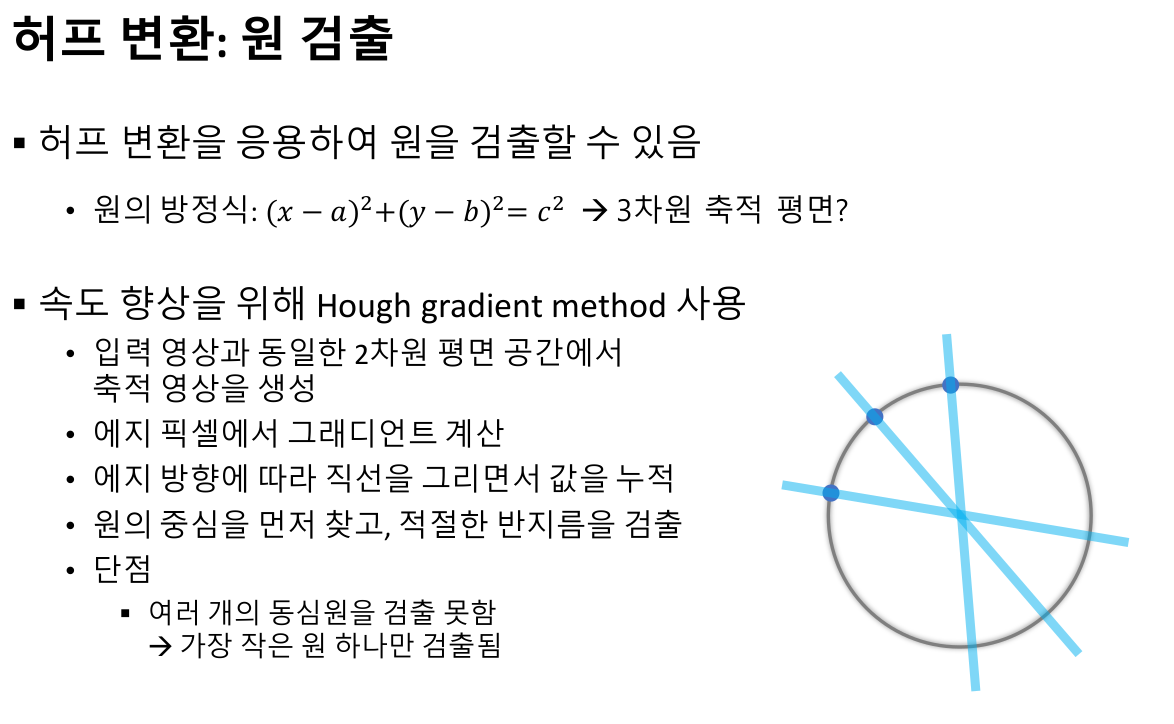

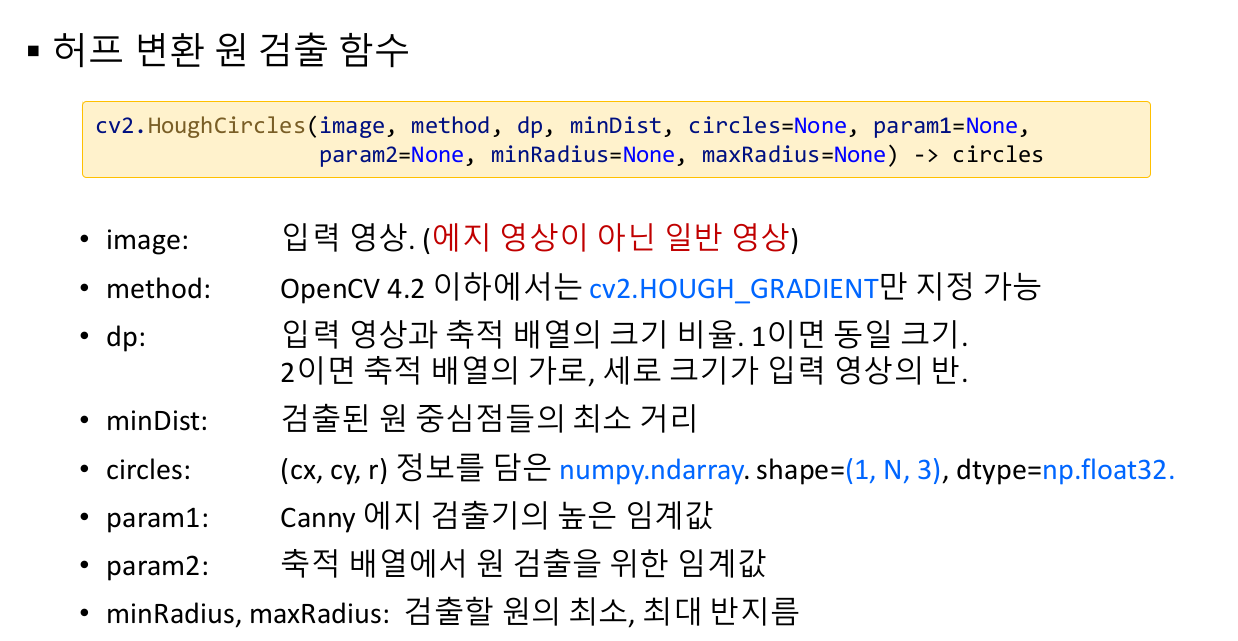

In [10]:
import sys
import numpy as np
import cv2

In [13]:
# 입력 이미지 불러오기
src = cv2.imread('../data/dial.jpg')

In [14]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)

In [ ]:
def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = cv2.getTrackbarPos('threshold', 'img')
    
    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=120, param2=th, minRadius=rmin, maxRadius=rmax)
    
    dst = src.copy()
    
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = circles[0][i]
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', dst)

In [ ]:
# 트랙바 생성
cv2.imshow('img', src)
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 0, 100, on_trackbar)
cv2.setTrackbarPos('minRadius', 'img', 10)
cv2.setTrackbarPos('maxRadius', 'img', 80)
cv2.setTrackbarPos('threshold', 'img', 40)
cv2.waitKey()

cv2.destroyAllWindows()